<a href="https://colab.research.google.com/github/brianr-v/Simulacion2/blob/main/Numero_Pi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metodología de la Simulación

### 1. Identifique las variables

Aquellas cuyo comportamiento define el comportamiento o la evoución global del sistema real.

### 2. Determine la distribución de probabilidad

Elija el tipo de distribución de probabilidad que mejor defina el comportamiento aleatorio de cada una de las variables del sistema identificadas en el paso anterior.

### 3. Modele las variables aleatorias

Cosntruya un modelo fiel de la aleatoriedad de las variables del sistema. Simular el comportamiento del sistema implica generar muestras aleatorias de cada variable que sigan fielmente la distribución de probabilidad correspondiente.

### 4. Defina el modelo del sistema y los objetivos de la simulación

Fije los objetivos y diseñe un modelo del sistema real que abstraiga sus propiedades más relevantes. Todo error en el modelo (o su implementación computacional) puede dar lugar a conclusiones equivocadas.

Antes de experimentar con el modelo, asegurarse de que refleja fielmente el sistema real **validando** el mismo a partir de datos reales, para ello compare los resultados obtenidos de la simulación con los producidos por el sistema.

### 5. Diseñe el experimento

Diseñe un experimento así como las ejecuciones concretas del mismo, los escenarios que desea estudiar para alcanzar los objetivos fijados. El experimento consiste en generar valores de las variables cuyo comportamiento define el comportamiento del sistema y analizar este ante dichos valores.

### 6. Repita el experimento $n$ veces

Así dispondrá de $n$ observaciones sobre el comportamiento del sistema, lo que permitirá entender su funcionamiento así como evaluar el desempeño del mismo frente a los diversos escenarios establecidos.

El **método Monte Carlo** se basa en la **Ley Fuerte de los Grandes Números** y el **Teorema del Límite Central**.

## Ejemplo

Calcule la probabilidad de que aparezcan dos caras lanzando tres veces una moneda al aire.

1. Analíticamente.
2. Mediante simulación.

Analiticamente:

Por simulación: Construimos el modelo en varios pasos.

**PASO 1**. Defina las variables que intervienen en el modelo.

Hay tres variables importantes en este método:
 * x_valores : se utiliza para guardar el valor de la transformada inversa.
 * g_valores: se utilaza para evaluar el "x_valor" en la función $f(x)=\sqrt(1-x²)$.
 * area : guarda los valores aproximados del area de pi.

**PASO 2**. Formule la distribución de probabilidad de cada variable.

Utilizaremos una distribución uniforme en el intervalo (0,1),es decir $u\sim(0,1)$, nos servira para generar números aleatorios.

Importamos las bibliotecas numpy y matplotlib.

In [1]:
import matplotlib.pyplot as plt
import numpy as np


Genero una función en donde grafico 1000 puntos de la funcion $f(x)=\sqrt(1-x²)$.

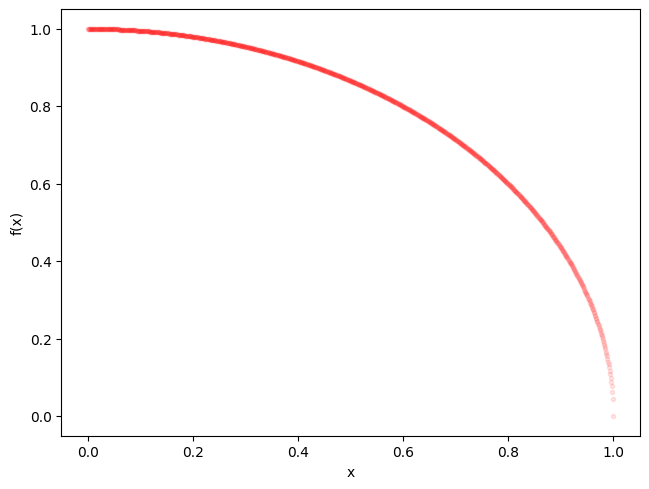

In [4]:
def funcion_g(x):
    # Define aquí la función g(X) que deseas evaluar
    return np.sqrt(1 - x**2)

def grafica_funcion(x_valores,g_valores):
    plt.scatter(x_valores, g_valores, marker='.', alpha=0.1, color ='red')
    plt.tight_layout()
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.show()

# Grafiaca de la funcion a integrar
x = np.linspace(0, 1, 1000)   # Genera 1000 puntos entre el 0 y el 1
funcion = funcion_g(x)        # Llama a la función que evaluara los puntos "x"
grafica_funcion(x,funcion)

**Creación del método**
Genero una funcion que se llama acierto_Rechazo que pide como valores, a: limite inferior de la funcion; b:limite superior de la función; c: constante que acota a la función; por último n: núero de iteraciones del método.
Lo que hace el método es lo siguiente:
* Genero un contador "aciertos" donde acumulo si el punto cayo dentro de la función.  
* Creo una lista vacia "area" donde sumo el valor aproximado del area.
* Creo un ciclo for que va de 1 al 1,001
  * Creo una lista "u" que contenga 2 números aleatorios.
  * Aplico la trasformada inversa que guardo en "x_valores".
  * Cuento los aciertos tales que $g(Xi) > c * U$ .
  * Estimo I calculando la media muestral θ2.
  * Por último regreso la lista "area".


In [ ]:
def acierto_Rechazo(a, b, c, n):
    aciertos = 0
    area = []
    for i in range(1,n+1):
        # Generar dos númeos aleatorios independientes
        u = np.random.uniform(0,1,2)

        # Aplicar la transformada inversa
        x_valores = a + u[0] * (b - a)      #Utilizar la tranformada inversa

        # Calcular g(Xi)
        g_valores = funcion_g(x_valores)

        # Paso 5: Contar los aciertos tales que g(Xi) > c * Un+i
        if g_valores > c * u[1]:
            aciertos += 1

        # Paso 6: Estimar I calculando la media muestral θ2
        theta_2 = c * (b - a) * (aciertos * 4 / i)
        area.append(theta_2)

        # Imprimir resultado
        #print(f"Estimación de la integral: {area:.4f}")
    return area


|      |**Sol**|**Aguila**|
|------|-------|----------|
|f(x)|         |          |

**PASO 3**. Enumere la distribución acumulada de probabilidad de cada variable.

|      |**Sol**|**Aguila**|
|------|-------|----------|
|f(x)  |       |          |
|F(x)  |       |          |

**PASO 4**. Establezca el intervalo de números aleatorios correspondiente a cada valor de cada una de las variables.

|           |**Sol**|**Aguila**|
|-----------|-------|----------|
|f(x)       |       |          |
|F(x)       |       |          |
|Intervalos |       |          |

**PASO 5**. Genere números aleatorios.

**PASO 6**. Simule un lanzamiento.

Si Número de caras = 2       

¿Aparecen dos caras? = **1**

Si Número de caras ≠ 2       

¿Aparecen dos caras? = **0**

**PASO 7**. Obtenga la gráfica de estabilización que indica que el tamaño de muestra utilizado es suficiente para
garantizar la convergencia del resultado.

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
def volados(n):
    caras = 0
    for i in range(n):
        u = random.uniform(0,1)
        if u <= 0.5:
            caras += 1
    return caras

In [ ]:
def caras(m):
    favorable = 0
    if volados(3) == m:
        favorable +=1
    return favorable

In [ ]:
def experimento(iteraciones):
    i = 0
    favorables=0
    Lista = []
    while i <= iteraciones:
        favorables = favorables + caras(2)
        i += 1
        probabilidad = favorables/i
        Lista.append(probabilidad)
    return Lista

In [ ]:
exp = experimento(2000)

In [ ]:
np.mean(exp)

In [ ]:
plt.plot(exp)
plt.xlabel('iteraciones')
plt.ylabel('p')
plt.title('Probabilidad de obtener 2 caras')
plt.show()

**PASO 8**. Replique el modelo.

In [ ]:
def simulacion_caras(repeticiones):
    List = []
    for i in range(repeticiones):
        List.append(np.mean(experimento(1000)))
    return List

In [ ]:
simulacion = simulacion_caras(50)

In [ ]:
plt.hist(simulacion)
plt.xlabel('iteraciones')
plt.ylabel('p')
plt.title('Probabilidad')
plt.show()

**PASO 9**. Calcule la probabilidad de que aparezcan dos caras lanzando tres veces una moneda al aire y su desviación
estándar.

In [ ]:
np.mean(simulacion), np.var(simulacion), np.std(simulacion)

**PASO 10**. Halle el intervalo de confianza de la probabilidad de queaparezcan dos caras lanzando tres veces una moneda
al aire con un nivel de confianza del $95 \%$.